## WordCloud
- conda active base
- pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

- Stop words 비교

In [5]:
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
# WordCloud 에서 제공하는 불용어
sw_wc = STOPWORDS
print(sw_wc)

{"doesn't", 'do', "there's", 'until', 'we', 'into', 'itself', 'further', 'him', 'most', 'them', 'themselves', 'are', 'below', 'their', 'where', 'does', 'been', 'up', 'not', 'of', 'had', "that's", 'i', 'out', 'all', 'hers', 'over', 'why', "they'll", 'would', 'that', 'off', "how's", 'theirs', 'however', "it's", "why's", 'else', 'having', 'once', 'by', 'about', 'but', 'on', 'hence', 'both', "they've", "haven't", "shouldn't", 'cannot', 'own', 'www', "aren't", 'at', 'being', 'also', 'so', 'they', 'yours', 'same', 'get', "who's", "she'd", "she's", 'other', 'your', 'from', 'her', 'can', 'the', "won't", 'few', "you've", "what's", 'herself', "shan't", 'if', 'this', "we've", 'doing', 'between', "you'd", 'here', "let's", "he'll", 'each', 'for', "i'd", 'have', 'is', 'ourselves', "i'll", 'than', "wouldn't", 'more', 'how', 'through', 'ought', 'yourself', 'was', "where's", 'his', 'or', "we'd", 'under', 'were', 'during', "you'll", 'just', 'as', "hadn't", 'with', 'against', 'shall', "you're", "hasn't",

In [16]:
len(sw_nltk), len(sw_wc)

(179, 192)

##### 1. Alice in Wonderland

In [17]:
with open('data/Alice.txt') as file:
    text = file.read()

In [19]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
    ).generate(text)

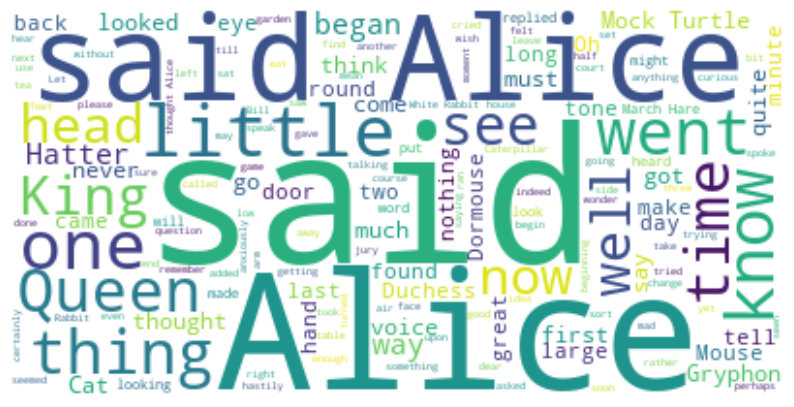

In [20]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')      #interpolation= : 보관법
plt.axis('off')
plt.show()

In [21]:
# 사용빈도 Top 10
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

said:	1.0
Alice:	0.7225433526011561
said Alice:	0.3352601156069364
little:	0.31213872832369943
one:	0.29190751445086704
know:	0.26011560693641617
went:	0.2398843930635838
thing:	0.23121387283236994
time:	0.22254335260115607
Queen:	0.21965317919075145


In [22]:
# stopwords에 said 추가
sw_wc.add('said')
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc
    ).generate(text)


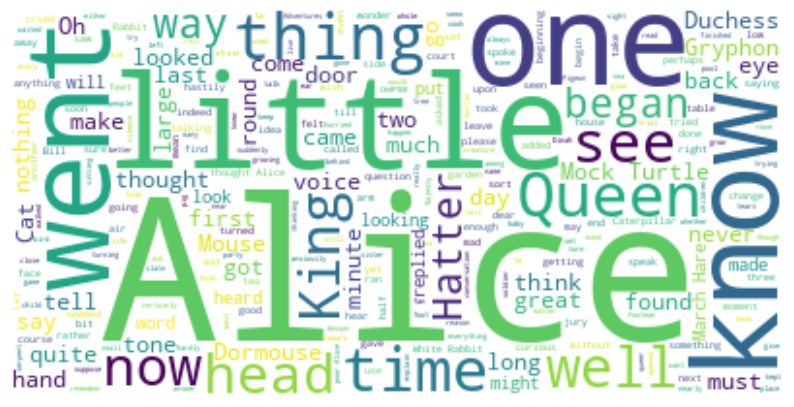

In [23]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

Alice:	1.0
little:	0.29508196721311475
one:	0.27595628415300544
know:	0.2459016393442623
went:	0.226775956284153
thing:	0.2185792349726776
time:	0.2103825136612022
Queen:	0.20765027322404372
see:	0.1830601092896175
King:	0.17486338797814208


- 배경 그림위에 표시하기

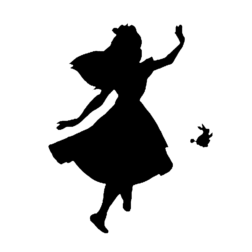

In [25]:
mask = np.array(Image.open('data/Alice_mask.png'))
plt.figure(figsize=(3, 5))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

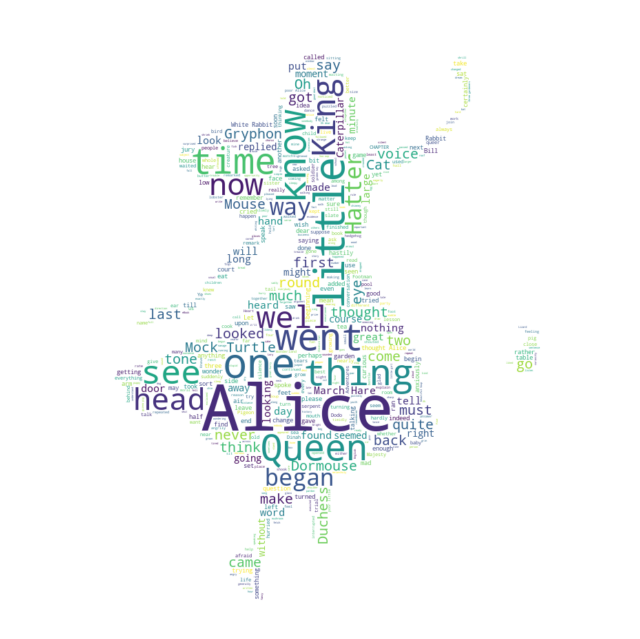

In [27]:
wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=sw_wc,
    mask=mask
    ).generate(text)

plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');        #plt.show() 대신 ;로 사용가능

##### 2. Star Wars

In [28]:
with open ('data/A_new_hope.txt') as file:
    text = file.read()

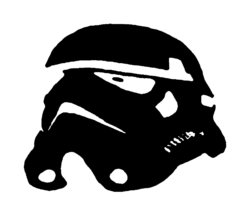

In [29]:
mask = np.array(Image.open('data/Stormtrooper_mask.png'))
plt.figure(figsize=(3, 3))
plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off');

In [30]:
wc =WordCloud(
    mask= mask, max_words=1000, stopwords=sw_wc, 
    margin=10, random_state=2023
    ).generate(text)
default_color = wc.to_array

In [31]:
# HSL: Hue(색상), Saturation(채도), Lightness(명도)
def grey_color(word, font_size, position, orientation, random_state, **kwargs):
    return f'hsl(0, 0%, {np.random.randint(60, 101)}%)'

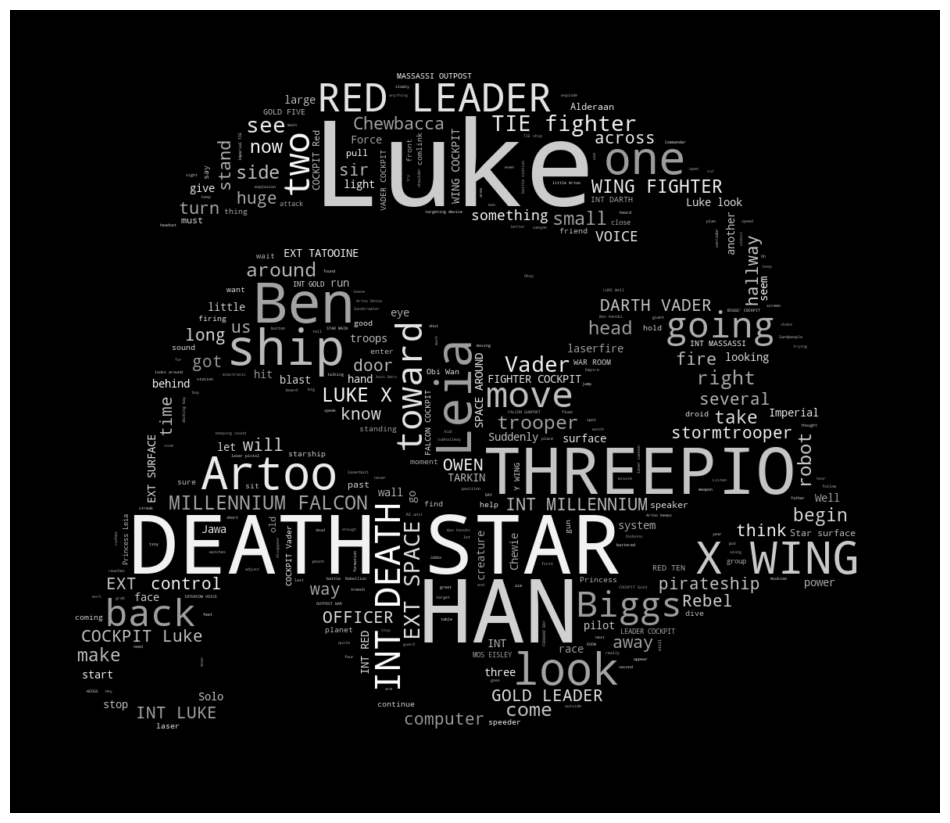

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023), interpolation='bilinear')
plt.axis('off');

In [33]:
count = 0
for key, val in wc.words_.items():
    print(f'{key}:\t{val}')
    count += 1
    if count >= 10:
        break

Luke:	1.0
HAN:	0.49053030303030304
DEATH STAR:	0.42424242424242425
THREEPIO:	0.3977272727272727
Ben:	0.2897727272727273
Leia:	0.21401515151515152
ship:	0.21401515151515152
Artoo:	0.1875
one:	0.18181818181818182
X WING:	0.17992424242424243


- 개선

In [34]:
# 이름 - 하나로 통일
text = text.replace('HAN','Han').replace('LUKE','Luke')

In [35]:
# 불용어에 int, ext 제거
sw = STOPWORDS
sw.add('INT'); sw.add('int'); sw.add('EXT'); sw.add('ext')

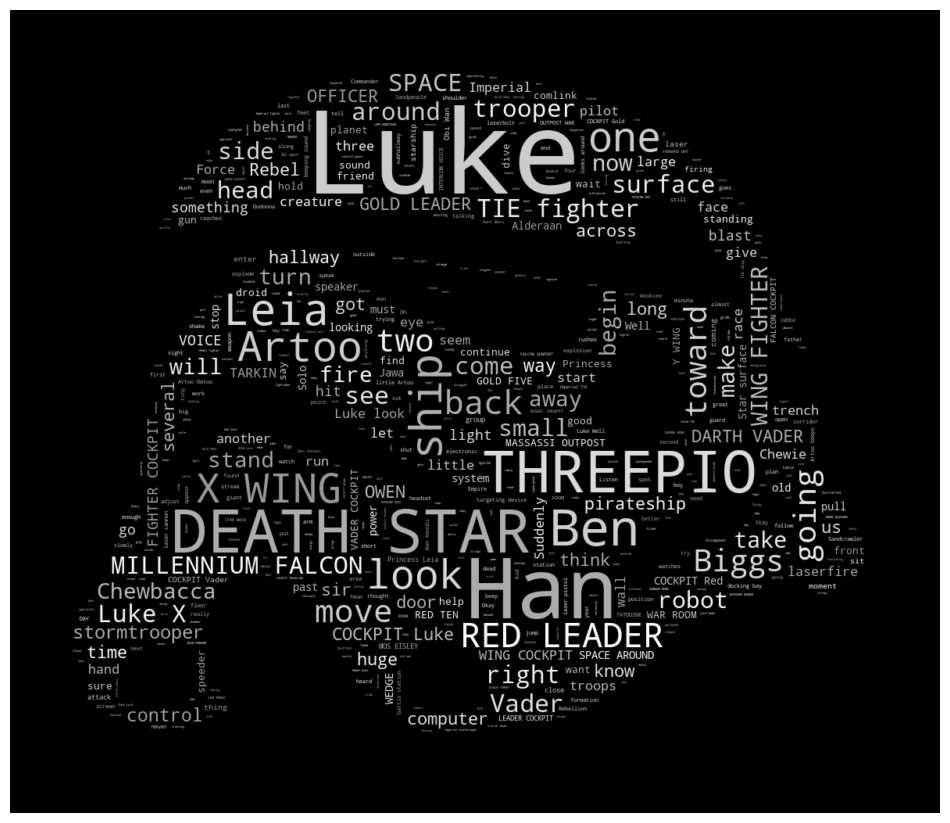

In [37]:
wc =WordCloud(
    mask= mask, max_words=1000, stopwords=sw, 
    margin=10, random_state=2023
    ).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color, random_state=2023), interpolation='bilinear')
plt.axis('off');